<a href="https://colab.research.google.com/github/towcorp/analise_noticias-vaderSentiment/blob/main/noticiasCripto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Sentimentos de Manchetes em Tempo Real

In [44]:
#Baxiar o pacote necessario
!pip install vaderSentiment

In [45]:
# importando as bibliotecas necessarias
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('rslp')
%matplotlib inline
import nltk.corpus
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [46]:
# CRIANDO A FUNÇÃO DE RASPAGEM DE DADOS
def parser(website):
    r = requests.get(website)
    content = r.content
    soup = BeautifulSoup(content, "html.parser")
    headings = soup.find_all(re.compile(r"^h\d$"))
    company = []
    for h in headings:
        # avoid ads
        if len(h.text.strip().split()) > 6:
            company.append(str.strip(h.text))
    return company

In [47]:
#  ADICIONANDO PRINCIPAIS PORTAIS DE NOTICIAS 
busca_sites = ["https://bitcoinist.com/", "https://ambcrypto.com/", "https://cryptopotato.com/", "https://www.newsbtc.com/", 'https://cashessentials.org/?s=bitcoin&gclid=CjwKCAjwhaaKBhBcEiwA8acsHGAfsRLQVishTHK4Dsid7pWqUm_cLH8ZJ5DMSk0UVUsJZ4oKieSacxoCercQAvD_BwE', 'https://www.coindesk.com/', 'https://cointelegraph.com.br/tags/bitcoin', 'https://www.independent.co.uk/life-style/gadgets-and-tech/bitcoin-news-live-price-btc-crypto-b1923315.html', 'https://finance.yahoo.com/topic/crypto/', 'https://www.independent.co.uk/life-style/gadgets-and-tech/bitcoin-news-live-price-btc-crypto-b1923315.html']

print('quantiadde de sites pesquisados:' , len(busca_sites))


quantiadde de sites pesquisados: 10


In [48]:
# aplicando busca de portais na função e gerando uuma lista das principais noticias
noticias = []
for site in busca_sites:
  noticias.append(parser(site))


In [49]:
# gerando as stopWords 
lista_stop = nltk.corpus.stopwords.words()
words = []
for i in noticias:
  for p in i:
    if p not in lista_stop:
      words.append(p)

words = str(words)


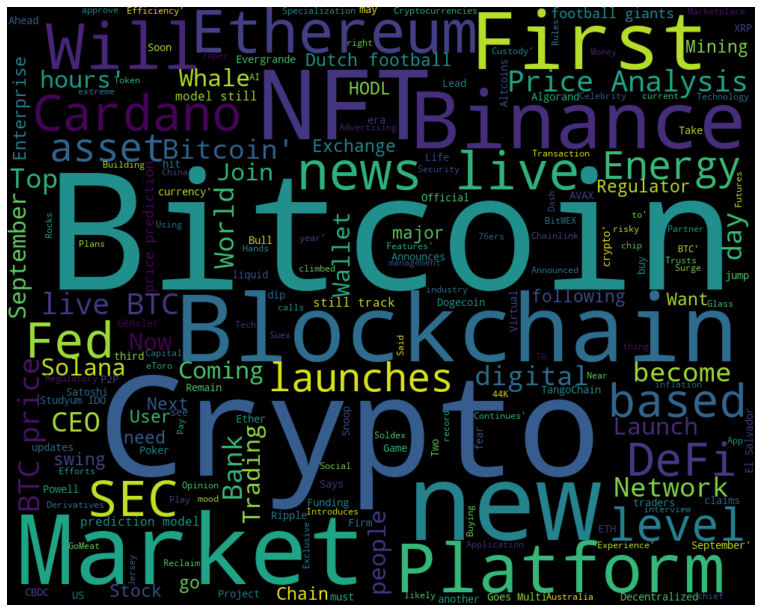

In [50]:
# criado a nuvem de palavras mais comentadas nas noticias
wordcloud = WordCloud(width=1000, height=800, margin=0).generate(words)
plt.figure(figsize=(20,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)

# Analisando as noticas

In [51]:
analiser = SentimentIntensityAnalyzer() 

analise_txt = pd.DataFrame()

In [52]:
def data_sentimento(dados_site):
  lst_dict = []
  analise_txt = pd.DataFrame()
  for site in dados_site:
    for text in site:
      sent1 = analiser.polarity_scores(text)
     
      lst_dict.append(sent1)
      sent1['text'] = text

    analise_txt = analise_txt.append(lst_dict)
  return analise_txt

sites_lidos = data_sentimento(noticias)
sites_lidos

,neg,neu,pos,compound,text
0,0.147,0.853,0.000,-0.2263,"Binance Teamed Up With US Law Enforcement, Too..."
1,0.000,1.000,0.000,0.0000,Is Snoop Dogg A Mysterious NFT Whale?
2,0.000,0.755,0.245,0.3818,Up-And-Coming Cardano Summit Promises An Epic ...
3,0.000,1.000,0.000,0.0000,A New Metaverse Project That Has Started to Sp...
4,0.000,1.000,0.000,0.0000,Is Snoop Dogg A Mysterious NFT Whale?
...,...,...,...,...,...
189,0.000,1.000,0.000,0.0000,Bitcoin price crashed 90 per cent in network g...
190,0.000,1.000,0.000,0.0000,Bitcoin wallet from the Satoshi Nakamoto era s...
191,0.000,1.000,0.000,0.0000,1/1Bitcoin news live: BTC price prediction mod...
192,0.000,1.000,0.000,0.0000,Bitcoin news live: BTC price prediction model ...


In [53]:
df = pd.DataFrame(np.array(sites_lidos), columns = ['negative', 'neutro', 'positive', 'compound', 'text'])
df.head()

,negative,neutro,positive,compound,text
0,0.147,0.853,0,-0.2263,"Binance Teamed Up With US Law Enforcement, Too..."
1,0,1,0,0,Is Snoop Dogg A Mysterious NFT Whale?
2,0,0.755,0.245,0.3818,Up-And-Coming Cardano Summit Promises An Epic ...
3,0,1,0,0,A New Metaverse Project That Has Started to Sp...
4,0,1,0,0,Is Snoop Dogg A Mysterious NFT Whale?


In [54]:
df['negative'].describe()

count     1258.0
unique      34.0
top          0.0
freq       997.0
Name: negative, dtype: float64

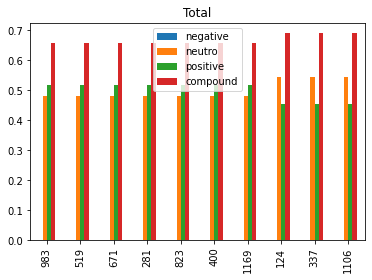

In [55]:
df.sort_values(by='positive', ascending=False).head(10).plot.bar(title="Total")

In [56]:
dfNP = df.drop(columns=('text'))
dfNP = dfNP.drop(columns=('compound'))
dfNP = dfNP.drop(columns=('neutro'))
dfNGmax = df.sort_values(by='negative', ascending=False).head(10)


([], <a list of 0 Text major ticklabel objects>)

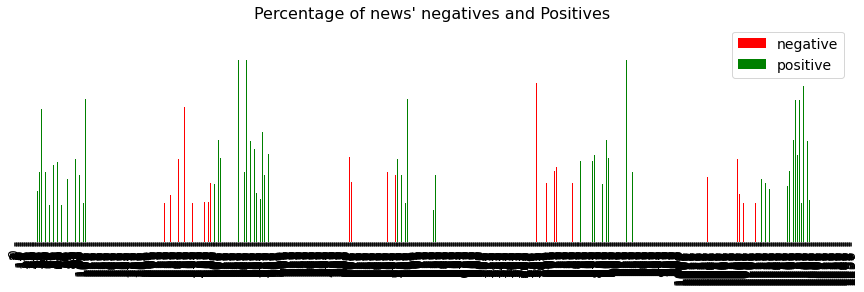

In [57]:
colors_list = ['red','green']
dfNP.plot(kind='bar',figsize=(15,4),width = 0.3,color = colors_list,edgecolor=None)
plt.legend(labels=dfNP.columns,fontsize= 14)
plt.title("Percentage of news' negatives and Positives",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

In [58]:
df.nunique()

negative     34
neutro       67
positive     54
compound     51
text        167
dtype: int64

In [59]:
df.max()*100

negative                                                 39.8
neutro                                                    100
positive                                                 51.9
compound                                                80.74
text        eToro Commits $1M Stake to GoodDollar Universa...
dtype: object

In [60]:
resultado = (df['negative']+df['positive']).mean()
print(round(resultado*100,2), '% favoravel')


11.98 % favoravel


4.24 % diferença COMPOSTA


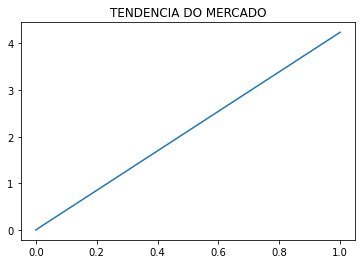

In [61]:
# TESTANDO VARIAÇÕES 

nega = df['negative'].max()-df['negative'].min()
posi = df['positive'].max()-df['positive'].min()
comp = df['compound'].max()+df['compound'].min()
favoravel = (posi+nega)
mercado = comp*100
print((round(mercado,2)), '% diferença COMPOSTA')

if mercado < 0:
  plt.plot([0, 1], [0, mercado])
  plt.title('TENDENCIA DO MERCADO')

  plt.show()
else:

  plt.plot([0, 1], [0, mercado])
  plt.title('TENDENCIA DO MERCADO')
  plt.show()

In [62]:
dominancia_mercado = df['compound'].mean()
print(round(dominancia_mercado,2), '% diferença MEDIA')

0.06 % diferença MEDIA


In [63]:
df.sort_values(by='negative', ascending=False).head(10)

,negative,neutro,positive,compound,text
481,0.398,0.435,0.168,-0.5719,BitcoinOrg Hacked: Giveaway Scam Promising Use...
785,0.398,0.435,0.168,-0.5719,BitcoinOrg Hacked: Giveaway Scam Promising Use...
243,0.398,0.435,0.168,-0.5719,BitcoinOrg Hacked: Giveaway Scam Promising Use...
633,0.398,0.435,0.168,-0.5719,BitcoinOrg Hacked: Giveaway Scam Promising Use...
945,0.398,0.435,0.168,-0.5719,BitcoinOrg Hacked: Giveaway Scam Promising Use...
1131,0.398,0.435,0.168,-0.5719,BitcoinOrg Hacked: Giveaway Scam Promising Use...
362,0.398,0.435,0.168,-0.5719,BitcoinOrg Hacked: Giveaway Scam Promising Use...
149,0.398,0.435,0.168,-0.5719,BitcoinOrg Hacked: Giveaway Scam Promising Use...
1244,0.383,0.421,0.196,-0.6124,The Airlines With The Worst Coach Seats — From...
1058,0.383,0.421,0.196,-0.6124,The Airlines With The Worst Coach Seats — From...


In [64]:
noticiaN = df.sort_values(by='negative', ascending=False).head(1)
noticiaN['text']

481    BitcoinOrg Hacked: Giveaway Scam Promising Use...
Name: text, dtype: object

In [65]:
df.sort_values(by='compound', ascending=False).head(-10)

,negative,neutro,positive,compound,text
1186,0,0.61,0.39,0.8074,The California-based asset manager said the ne...
1000,0,0.61,0.39,0.8074,The California-based asset manager said the ne...
536,0,0.61,0.39,0.8074,The California-based asset manager said the ne...
840,0,0.61,0.39,0.8074,The California-based asset manager said the ne...
688,0,0.61,0.39,0.8074,The California-based asset manager said the ne...
...,...,...,...,...,...
958,0.338,0.662,0,-0.6249,Ethereum Price Analysis: ETH Bulls Fight to Re...
798,0.338,0.662,0,-0.6249,Ethereum Price Analysis: ETH Bulls Fight to Re...
646,0.338,0.662,0,-0.6249,Ethereum Price Analysis: ETH Bulls Fight to Re...
256,0.338,0.662,0,-0.6249,Ethereum Price Analysis: ETH Bulls Fight to Re...
